In [1]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt

# Closed form modelling

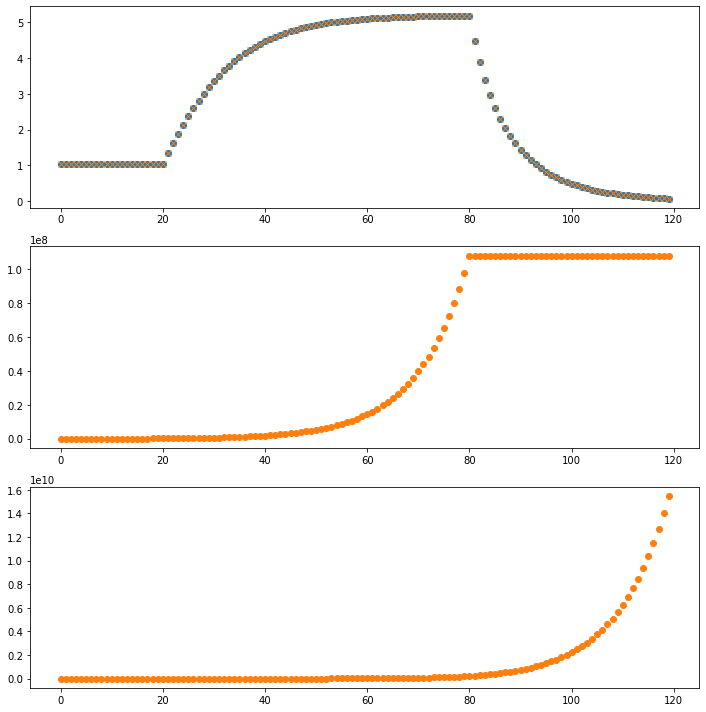

In [2]:
# these are output from the simulation

savedir = '.'
with open(os.path.join(savedir, 'whale_shares.pkl'), 'rb') as f:
    mwshares = pickle.load(f)
with open(os.path.join(savedir, 'curator_shares.pkl'), 'rb') as f:
    mcshares = pickle.load(f)
with open(os.path.join(savedir, 'ratio.pkl'), 'rb') as f:
    mratios = pickle.load(f)

c_shares = c_dep = mcshares[0]
w_shares = w_dep = 10_000
total_shares = initial_shares = c_shares + w_shares

ratio = [10 * w_shares / c_shares]
c_shares_list = [c_shares]
w_shares_list = [w_shares]

w_deps_list = [w_dep]
c_deps_list = [c_dep]

r = 1e-4
Δt = 1000

for i in range(1, 120):
#     mint = (initial_shares * (1 + r * Δt) ** (i-1)) * (r * Δt)
    total_shares = initial_shares * ((1+r) ** Δt) ** i

    # a formula can be used for the number of shares during periods of constant stake (fraction).
    # the fraction changes due to the whale's deposit / withdrawal.
    if i <= 20:
        w_frac = w_dep / (c_dep + w_dep)
        c_shares = total_shares * (1 - w_frac)
        w_shares = total_shares * w_frac
        w_deps_list.append(10_000)
        c_deps_list.append(c_dep)
    elif 20 < i <= 80:
        w_frac = (w_dep + 40_000) / (c_dep + w_dep + 40_000)
        total_shares_20 = w_shares_list[20] + c_shares_list[20]
        c_shares = c_shares_list[20] + (total_shares - total_shares_20) * (1 - w_frac)
        w_shares = w_shares_list[20] + (total_shares - total_shares_20) * w_frac
        w_deps_list.append(50_000)
        c_deps_list.append(c_dep)
    else:
        w_frac = 0
        total_shares_80 = w_shares_list[80] + c_shares_list[80]
        c_shares = c_shares_list[80] + (total_shares - total_shares_80) * (1 - w_frac)
        w_shares = w_shares_list[80] + (total_shares - total_shares_80) * w_frac
        w_deps_list.append(0)
        c_deps_list.append(c_dep)
    

    c_shares_list.append(c_shares)
    w_shares_list.append(w_shares)
    ratio.append(w_shares * 10 / c_shares)

f, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].plot(ratio, 'o')
axs[0].plot(mratios, 'x')

axs[1].plot(mwshares, '.')
axs[1].plot(w_shares_list, 'o')

axs[2].plot(mcshares, '.')
axs[2].plot(c_shares_list, 'o')

plt.tight_layout()

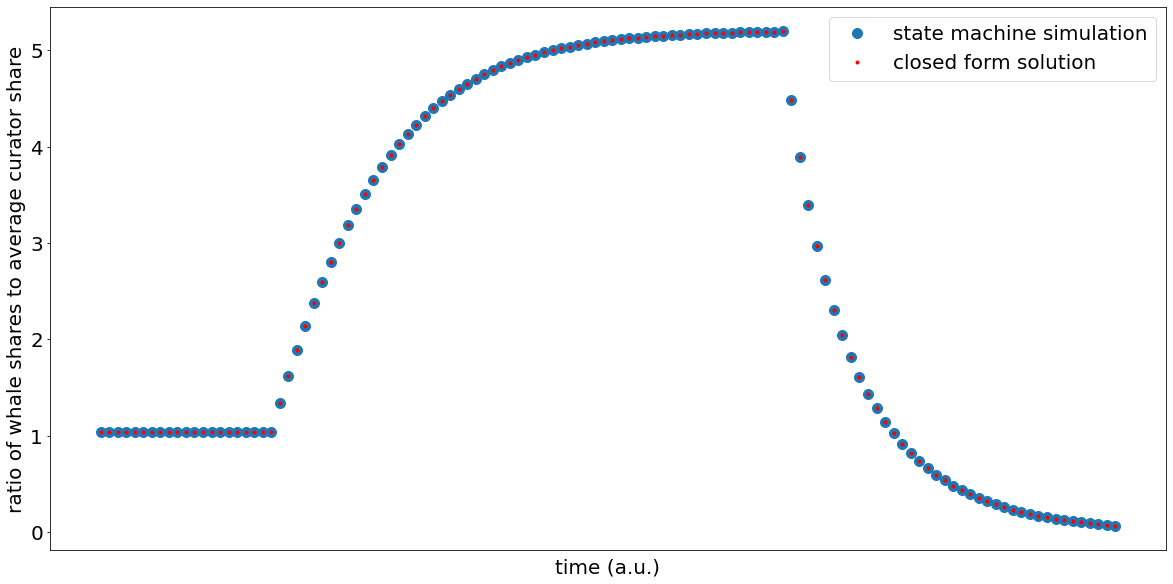

In [3]:
f, axs = plt.subplots(figsize=(20, 10))
axs.plot(mratios, 'o', markersize=10, label='state machine simulation')
axs.plot(ratio, '.r', label='closed form solution')
# axs.set_ylim([4.5, 5.2])
axs.set_xticks([])
axs.set_xlabel('time (a.u.)', fontsize=20)
axs.set_ylabel('ratio of whale shares to average curator share', fontsize=20)
axs.tick_params(axis='both', which='major', labelsize=20)
axs.legend(fontsize=20)

f.savefig('closed_form.png')

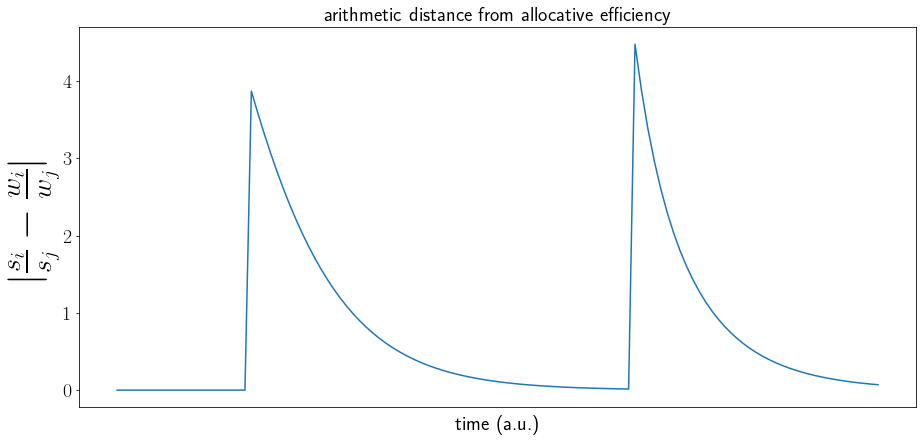

In [4]:
plt.rcParams['text.usetex'] = True

f, axs = plt.subplots(figsize=(15, 7))
ea = [abs(r - 10*w/c) for r, w, c in zip(ratio, w_deps_list, c_deps_list)]
axs.plot(ea, markersize=10)
axs.set_xticks([])
axs.set_xlabel('time (a.u.)', fontsize=20)
axs.set_ylabel(r'$|\frac{s_i}{s_j}-\frac{w_i}{w_j}|$', fontsize=40)
axs.tick_params(axis='both', which='major', labelsize=20)
axs.set_title('arithmetic distance from allocative efficiency', fontsize=20)

f.savefig('distance_from_ea.png')